# Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import dataset

In [2]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)

In [5]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# Exploratory Data Analysis

## Missing Data

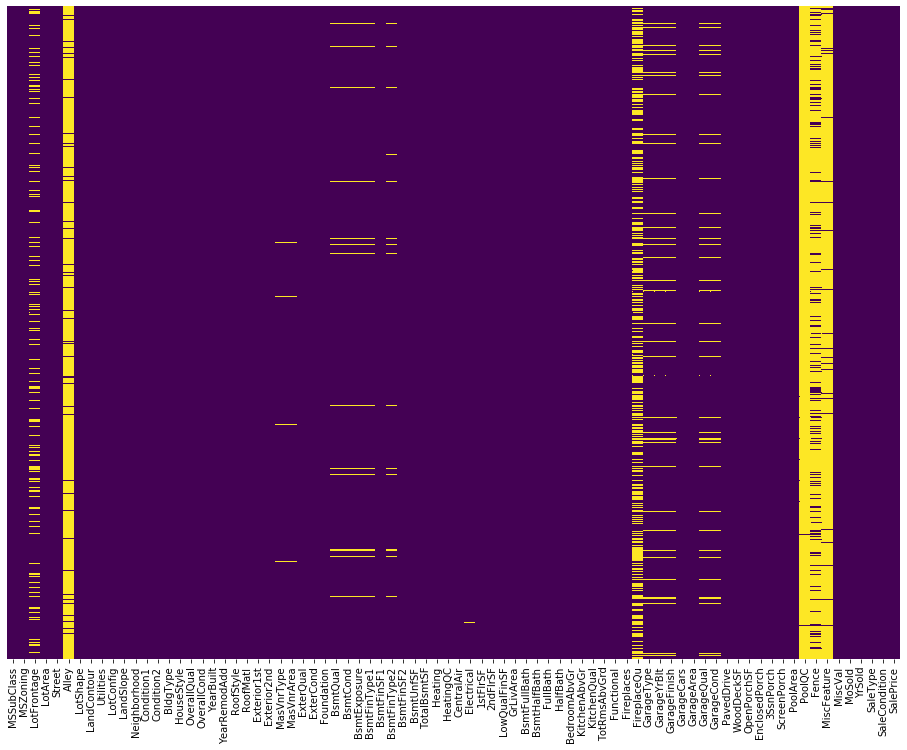

In [6]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

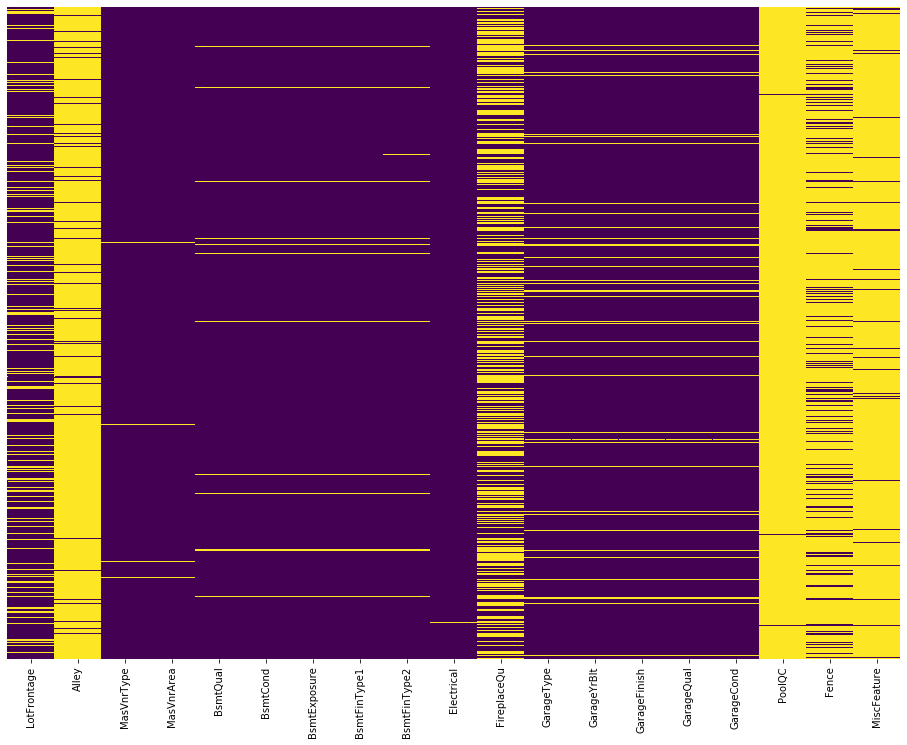

In [7]:
f, ax = plt.subplots(figsize=(16, 12))
col_missing_data = df_train.columns[df_train.isnull().sum() > 0].tolist()
sns.heatmap(df_train[col_missing_data].isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [8]:
# df_train.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

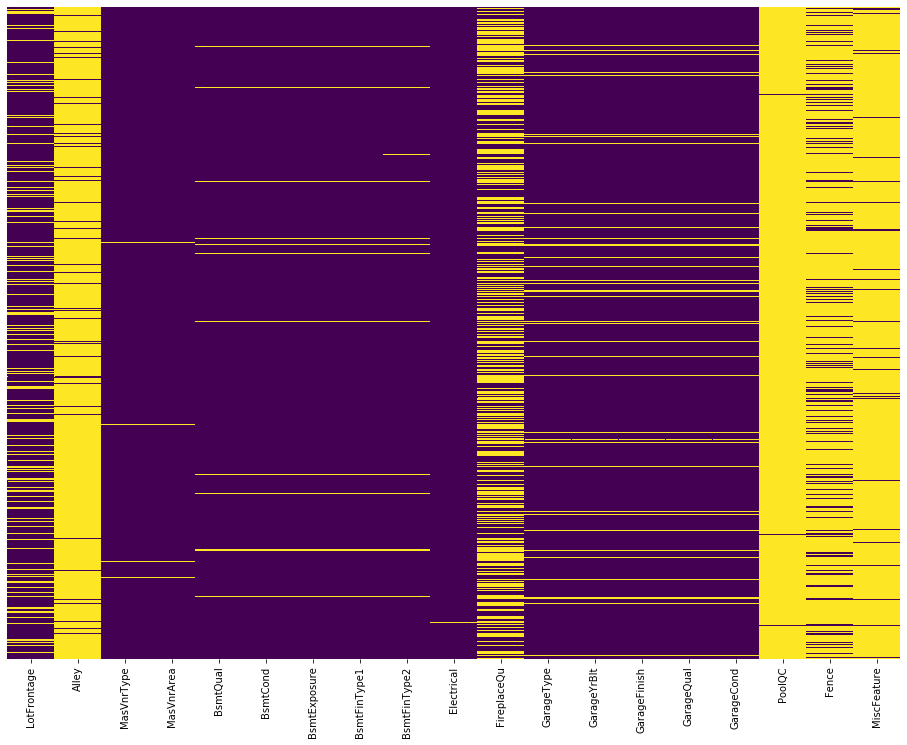

In [9]:
f, ax = plt.subplots(figsize=(16, 12))
col_missing_data = df_train.columns[df_train.isnull().sum() > 0].tolist()
sns.heatmap(df_train[col_missing_data].isnull(), cbar=False, yticklabels=False, cmap='viridis')

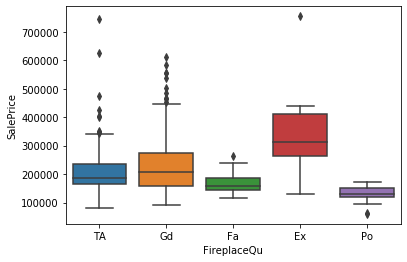

In [10]:
sns.boxplot(x=df_train['FireplaceQu'], y = df_train['SalePrice'])

In [11]:
df_train['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [12]:
df_train['FireplaceQu'] = df_train['FireplaceQu'].apply(lambda x : 0 if str(x) == 'nan' else x)

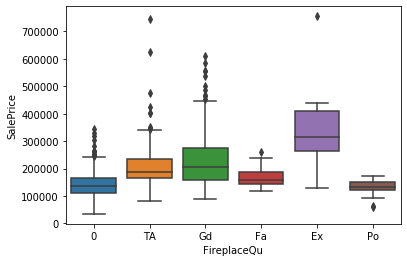

In [13]:
sns.boxplot(x=df_train['FireplaceQu'], y = df_train['SalePrice'])

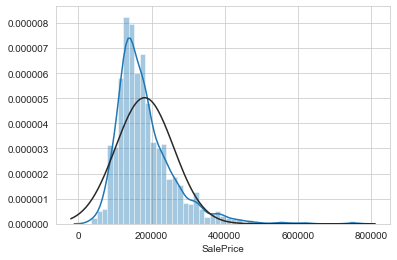

In [14]:
sns.set_style('whitegrid')
sns.distplot(df_train["SalePrice"],fit=norm)

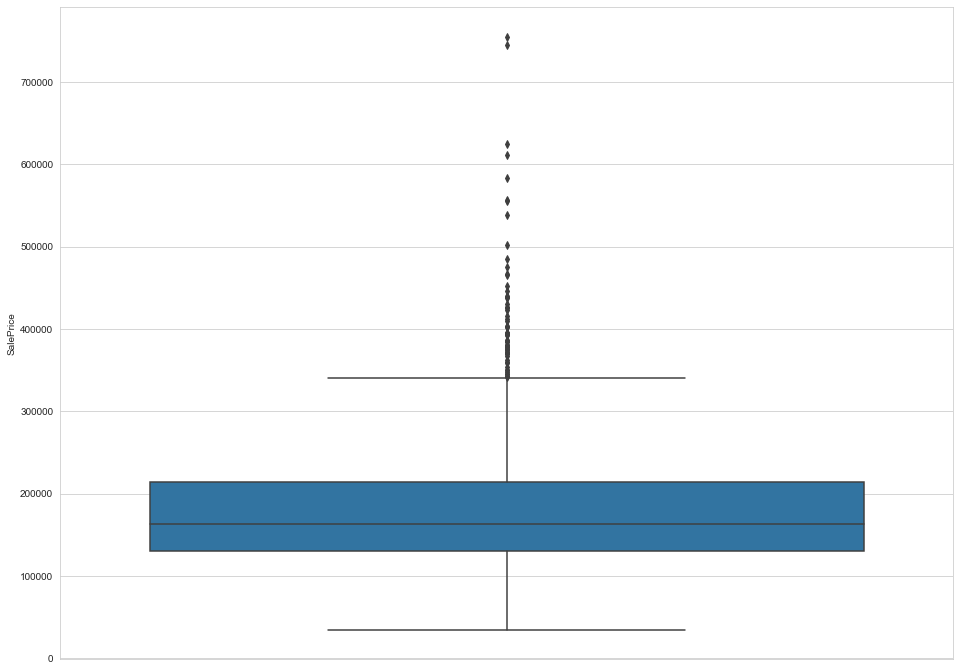

In [15]:
f, ax = plt.subplots(figsize=(16, 12))
sns.boxplot(y=df_train["SalePrice"])

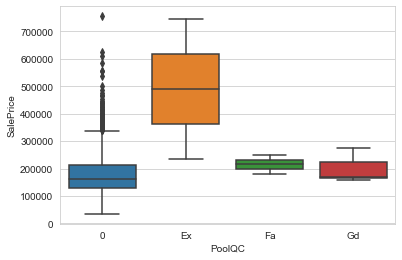

In [16]:
df_train['PoolQC'] = df_train['PoolQC'].apply(lambda x : 0 if str(x) == 'nan' else x)
sns.boxplot(x=df_train['PoolQC'], y = df_train['SalePrice'])

### Handle high missing amount of data

In [17]:
cols = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu']
for col in cols:
    print(df_train[col].value_counts())
    print(df_train[col].nunique()) 

Grvl    50
Pave    41
Name: Alley, dtype: int64
2
0     1453
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64
4
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
4
Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64
4
0     690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
6


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
for col in cols:
    le = LabelEncoder()
    le.fit(df_train[col].unique().astype('str'))
    print(le.classes_)
    df_train.loc[:,col] = le.transform(df_train.loc[:,col].astype('str'))
    print(list(df_train.loc[:,col].unique()))

df_train[cols].head()

['Grvl' 'Pave' 'nan']
[2, 0, 1]
['0' 'Ex' 'Fa' 'Gd']
[0, 1, 2, 3]
['GdPrv' 'GdWo' 'MnPrv' 'MnWw' 'nan']
[4, 2, 1, 0, 3]
['Gar2' 'Othr' 'Shed' 'TenC' 'nan']
[4, 2, 0, 1, 3]
['0' 'Ex' 'Fa' 'Gd' 'Po' 'TA']
[0, 5, 3, 2, 1, 4]


,Alley,PoolQC,Fence,MiscFeature,FireplaceQu
0,2,0,4,4,0
1,2,0,4,4,5
2,2,0,4,4,5
3,2,0,4,4,3
4,2,0,4,4,5


In [20]:
cols.extend(['SalePrice'])
df_train[cols].head()

,Alley,PoolQC,Fence,MiscFeature,FireplaceQu,SalePrice
0,2,0,4,4,0,208500
1,2,0,4,4,5,181500
2,2,0,4,4,5,223500
3,2,0,4,4,3,140000
4,2,0,4,4,5,250000


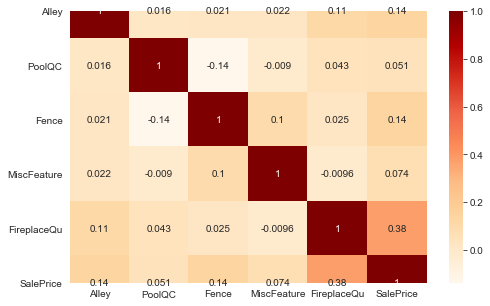

In [21]:
#heatmap might not be a good reference when there's huge missing data
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df_train[cols].corr(), cbar=True, cmap='OrRd', annot=True)

In [22]:
df_train['FireplaceQu'].isnull().sum()/df_train.count().max()

0.0

In [23]:
col_missing_data = df_train.columns[df_train.isnull().sum() > 0].tolist()
df_train[col_missing_data].head(20)

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
5,85.0,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,1993.0,Unf,TA,TA
6,75.0,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Attchd,2004.0,RFn,TA,TA
7,NaN,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,Attchd,1973.0,RFn,TA,TA
8,51.0,None,0.0,TA,TA,No,Unf,Unf,FuseF,Detchd,1931.0,Unf,Fa,TA
9,50.0,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,Attchd,1939.0,RFn,Gd,TA


## Strategy For missing data

### Categorical

In [24]:
df_train[col_missing_data]

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,Attchd,1999.0,RFn,TA,TA
1456,85.0,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,1978.0,Unf,TA,TA
1457,66.0,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,1941.0,RFn,TA,TA
1458,68.0,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,1950.0,Unf,TA,TA


In [25]:
categoricals = df_train.select_dtypes(exclude=np.number).columns.tolist()
categoricals

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [26]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 
  
missing_categorical_cols = intersection(col_missing_data, categoricals)
missing_categorical_cols

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [27]:
#someone figure out what this data refers to and think of the strategy to fill in
for col in missing_categorical_cols:
    print(df_train[col].unique())
    le = LabelEncoder()
    le.fit(df_train[col].unique().astype('str'))
    print(le.classes_)
    df_train.loc[:,col] = le.transform(df_train.loc[:,col].astype('str'))
    print(list(df_train.loc[:,col].unique()))

['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
['BrkCmn' 'BrkFace' 'None' 'Stone' 'nan']
[1, 2, 3, 0, 4]
['Gd' 'TA' 'Ex' nan 'Fa']
['Ex' 'Fa' 'Gd' 'TA' 'nan']
[2, 3, 0, 4, 1]
['TA' 'Gd' nan 'Fa' 'Po']
['Fa' 'Gd' 'Po' 'TA' 'nan']
[3, 1, 4, 0, 2]
['No' 'Gd' 'Mn' 'Av' nan]
['Av' 'Gd' 'Mn' 'No' 'nan']
[3, 1, 2, 0, 4]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['ALQ' 'BLQ' 'GLQ' 'LwQ' 'Rec' 'Unf' 'nan']
[2, 0, 5, 4, 1, 6, 3]
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
['ALQ' 'BLQ' 'GLQ' 'LwQ' 'Rec' 'Unf' 'nan']
[5, 1, 6, 0, 4, 3, 2]
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
['FuseA' 'FuseF' 'FuseP' 'Mix' 'SBrkr' 'nan']
[4, 1, 0, 2, 3, 5]
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
['2Types' 'Attchd' 'Basment' 'BuiltIn' 'CarPort' 'Detchd' 'nan']
[1, 5, 3, 4, 6, 2, 0]
['RFn' 'Unf' 'Fin' nan]
['Fin' 'RFn' 'Unf' 'nan']
[1, 2, 0, 3]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['Ex' 'Fa' 'Gd' 'Po' 'TA' 'nan']
[4, 1, 2, 5, 0, 3]
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
['Ex' 'Fa' 'Gd' 'Po' 'TA' 'nan']
[4, 1, 

In [28]:
#FILL CATEGORICAL

### Encoding Categorical Data

In [29]:
for categorical in categoricals:
    df_train.loc[:,categorical] = label_encoder.fit_transform(df_train.loc[:,categorical].astype('str')).astype('float64')
df_train[categoricals].head()

NameError: name 'label_encoder' is not defined

### Numeric

In [ ]:
numericals = df_train.select_dtypes(include=np.number).columns.tolist()
numericals

In [ ]:
missing_numerical_cols = intersection(col_missing_data, numericals)
missing_numerical_cols

In [ ]:
df_train[df_train['GarageYrBlt'].isnull()]['GarageArea'].sum()

In [ ]:
df_train[df_train['GarageYrBlt'].isnull()]['GarageCars'].sum()

In [ ]:
#someone figure out what this data refers to and think of the strategy to fill in
for missing_numerical in missing_numerical_cols:
    print(df_train[missing_numerical].unique())

In [ ]:
#FILL NUMERIC

In [ ]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

# Visualizations

In [ ]:
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(df_train.corr(), cmap = 'OrRd');

In [30]:
df_train.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
FireplaceQu      0.378377
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
Electrical       0.234716
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
Fence            0.140640
Alley            0.139868
ScreenPorch      0.111447
PoolArea         0.092404
MiscFeature      0.073609
PoolQC           0.051364
MoSold           0.046432
3SsnPorch        0.044584
MasVnrType       0.029658
GarageCond       0.025149
BsmtCond         0.015058
BsmtFinType2     0.008041
GarageQual  

In [31]:
#Start with Weak Positive Correlation
corr = df_train.corr()['SalePrice'][abs(df_train.corr()['SalePrice']) > 0.5].sort_values(ascending = False)
corr

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageFinish   -0.549247
BsmtQual       -0.620886
Name: SalePrice, dtype: float64

In [ ]:
#Closer Look with values that correlate with saleprice.

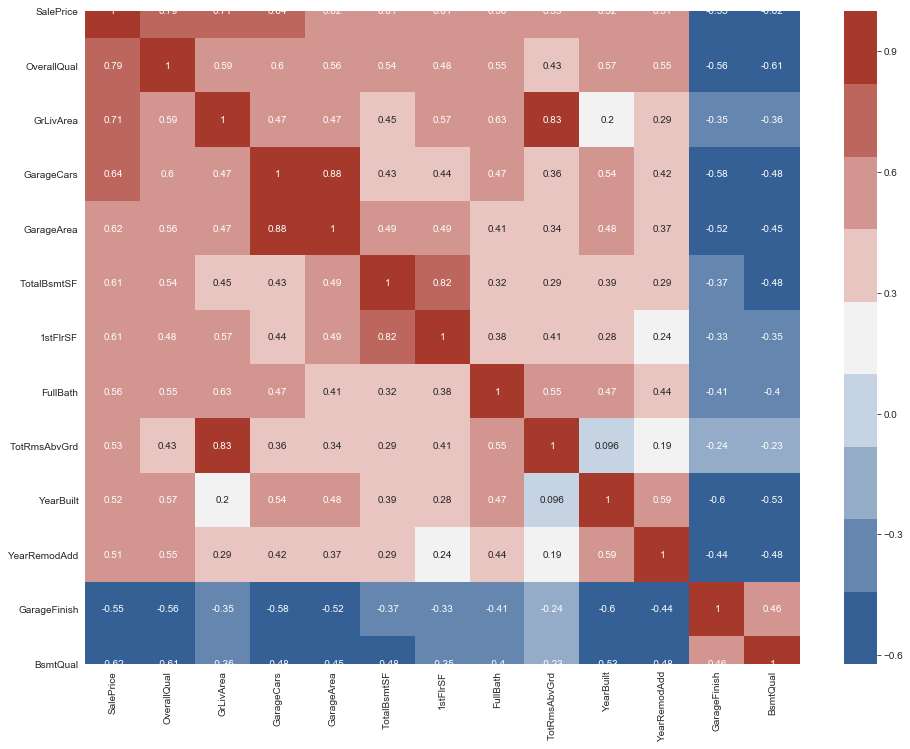

In [32]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train[corr.index].corr(), cbar=True, annot=True, cmap=sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light"));

In [ ]:
# Strong Correlation values between predictor variable!
# GarageCars & GarageArea. Increase In Area of Garage -> Increase in number Cars
# TotRmsAbvGrd & GrLivArea. Total rooms above grade (does not include bathrooms) & Above grade (ground) living area square feet
# 1stFlrSF & TotalBsmtSF. First Floor square feet & Total square feet of basement area

In [ ]:
# REMOVE FEATURE
# 1) Garage Area - People dont think about how many Msq when viewing the garage. They estimate how many cars can fit into the garage

In [ ]:
sns.scatterplot(x = df_train['SalePrice'], y = df_train['GarageFinish'])

In [ ]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train[corr.index].isnull(), cmap = 'Greys');

In [ ]:
df_train['SalePrice'].describe()

In [ ]:
sns.set(style="whitegrid",)
plt.figure(figsize=(16, 6))
ax = sns.boxplot(y=df_train["SalePrice"])

In [ ]:
sns.distplot(df_train["SalePrice"],fit=norm)

In [ ]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())
# Positive skew https://becominghuman.ai/how-to-deal-with-skewed-dataset-in-machine-learning-afd2928011cc


In [ ]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

In [ ]:
sns.distplot(df_train["SalePrice"],fit=norm)

In [ ]:
sns.pairplot(data = df_train[cor.index])

# Data Pre-Processing

In [ ]:
# shuffle here
# k-fold cross validation

X_train = df_train.iloc[:,:-1].values
y_train = df_train.iloc[:,-1].values
X_valid =
y_valid =

In [ ]:
X_train

# Prediction

## XGBoost

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

In [ ]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train)

In [ ]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)],
             verbose=False)

In [ ]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

In [ ]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

## RandomForestRegressor

## 3-layer Feedforward Neural Network

# Ridge/lasso regression